In [1]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("./data/titanic.csv")

#### hacer siempre una copia para que no haga la prueba con numéricas

In [3]:
df_t = df.copy()

In [4]:
df_t.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


In [5]:
target_col = "alive"

In [6]:


def get_features_cat_classification(df, target_col, normalize=False, mi_threshold=0):
    """
    La función get_features_cat_classification realiza una selección de las columnas categóricas de un dataframe en base a su mutual information con respecto a la columna objetivo.
   

    Argumentos:
    - df (DataFrame): DataFrame de entrada.
    - target_col (str): Nombre de la columna que se considerará como target para la selección.
    - normalize (bool): Indica si se debe normalizar la mutual information. Por defecto, False.
    - mi_threshold (float): Umbral de mutual information para la selección. Por defecto, 0.

    Devuelve una lista con las columnas categóricas seleccionadas.

    """

    # Comprobar que 'target_col' es una variable categórica del dataframe
    if target_col not in df.columns or df[target_col].dtype.name not in ['object', 'category']:
        print(f"Error: '{target_col}' no es una variable categórica en el dataframe.")
        return None
    
    # Obtener las columnas categóricas
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    
    # Verificar que 'mi_threshold' sea un valor float entre 0 y 1; y si 'normalize' es True
    if normalize and not (isinstance(mi_threshold, float) and 0 <= mi_threshold <= 1):
        print("Error: 'mi_threshold' debe ser un valor float entre 0 y 1 cuando normalize es True.")
        return None
    
    # Convertir las columnas categóricas a valores numéricos
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        df[col] = label_encoder.fit_transform(df[col])
    
    # Calcula la  mutual information
    mi_values = mutual_info_classif(df[categorical_columns], df[target_col])
    
    # Normalizar mutual information si es necesario
    if normalize:
        total_mi = sum(mi_values)
        if total_mi == 0:
            print("Error: No se puede normalizar la mutual information porque la suma de valores es cero.")
            return None
        
        mi_values = mi_values / total_mi
    
    # Seleccionar columnas cuya mutual information cumple con el umbral
    selected_columns = [categorical_columns[i] for i, mi_value in enumerate(mi_values) if mi_value >= mi_threshold]
    
    return selected_columns


In [7]:
selected_columns = ['sex', 'who', 'alive']

In [10]:
#muestra de como usar la función
selected_columns = get_features_cat_classification(df, target_col, normalize=False, mi_threshold=0.1)

# Imprimir las columnas seleccionadas
print("Columnas seleccionadas:", selected_columns)

Columnas seleccionadas: ['sex', 'who', 'alive']


In [11]:

def plot_features_cat_classification(df, target_col="", columns=[], mi_threshold=0.0, normalize=False):
    """
   Visualiza la distribución de las etiquetas de las columnas categóricas en relación con la columna objetivo.

    Argumentos:
    - df (DataFrame): DataFrame de entrada.
    - target_col (str): Nombre de la columna que se considerará como target para la selección. Por defecto, "".
    - columns (list): Lista de columnas a considerar. Por defecto, [].
    - mi_threshold (float): Umbral de mutual information para la selección. Por defecto, 0.0.
    - normalize (bool): Indica si se debe normalizar la mutual information. Por defecto, False.

    Devuelve:
    None

    """
    # Comprobar que 'target_col' es una variable categórica del dataframe
    if target_col not in df.columns or df[target_col].dtype.name not in ['object', 'category']:
        print(f"Error: '{target_col}' no es una variable categórica en el dataframe.")
        return None
    
    # Si la lista de columnas está vacía, seleccionar todas las variables categóricas del dataframe
    if not columns:
        columns = df.select_dtypes(include=['object', 'category']).columns
    
    # Seleccionar columnas que cumplen con el umbral de mutual information
    selected_columns = get_features_cat_classification(df, target_col, normalize, mi_threshold)
    selected_columns = [col for col in selected_columns if col in columns]

    # Comprobar si no se seleccionaron columnas
    if not selected_columns:
        print("No se seleccionaron columnas que cumplieran con los criterios especificados.")
        return None
    
    # Pintar la distribución de etiquetas para cada columna seleccionada
    for col in selected_columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue=target_col, data=df)
        plt.title(f'Distribución de {col} respecto a {target_col}')
        plt.show()


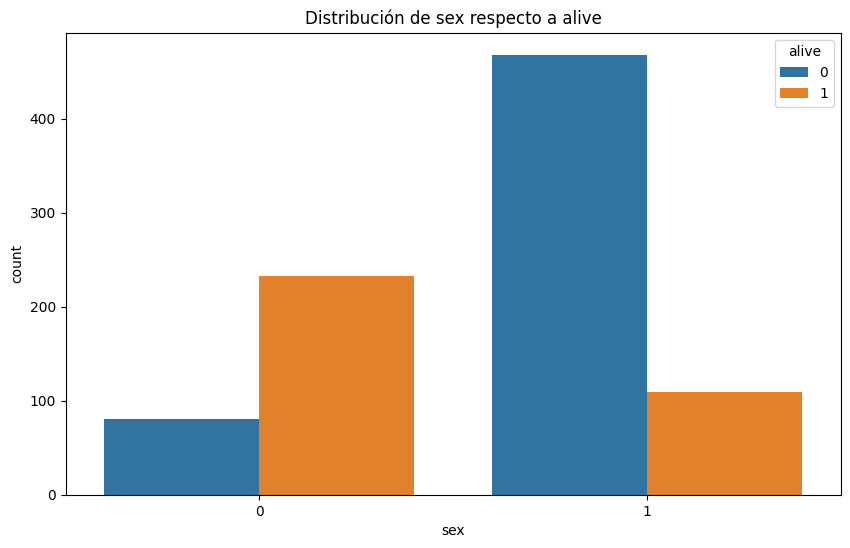

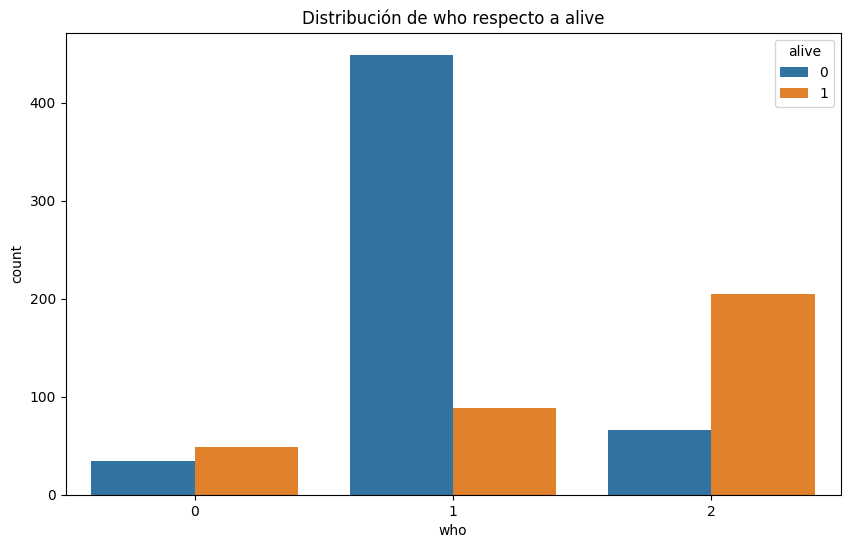

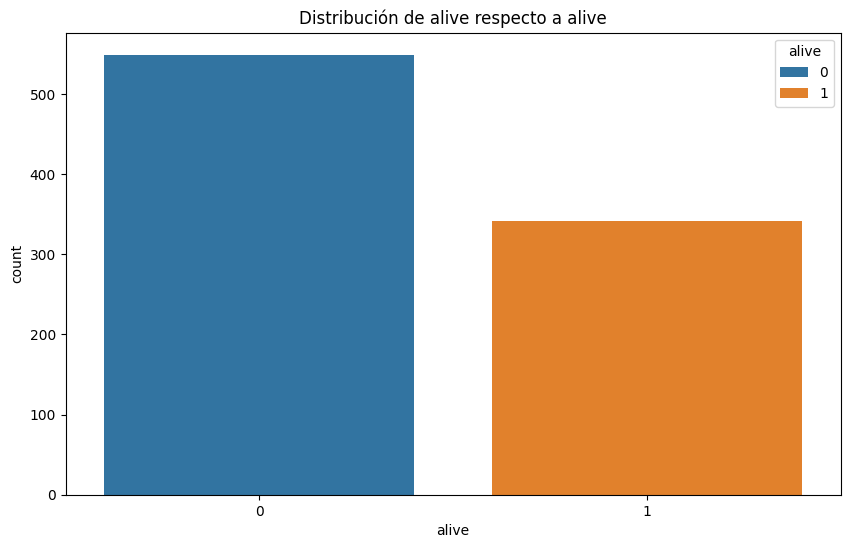

In [12]:
#muestra de como usar la función

plot_features_cat_classification(df_t, target_col, selected_columns, mi_threshold=0.1, normalize=False)